# Projeção de dados alguns dados não sei ainda

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import statsmodels as sm
from multidata import *

In [2]:
%run ../Limpezas/limpeza_análise_energética.ipynb

## Auto Regression (AR)

In [3]:
df = MultiData(dict_analise_energetica)

In [4]:
df[0]

,ANO,NÃO RENOVÁVEL,PETRÓLEO,GÁS NATURAL,CARVÃO VAPOR,CARVÃO METALÚRGICO,URÂNIO (U3O8),OUTRAS NÃO RENOVÁVEIS,RENOVÁVEL,ENERGIA HIDRÁULICA,LENHA,PRODUTOS DA CANA,EÓLICA,SOLAR¹,OUTRAS RENOVÁVEIS
0,1970,10590.447529,8160.72264,1254.649939,611.240406,503.768412,0.0,60.066132,39038.398172,3422.886,31851.534288,3600.695085,0.0,0.0,163.2828
1,1971,10933.709438,8521.00028,1169.286098,653.753394,532.646856,0.0,57.022809,39539.969319,3715.114,31807.22202,3841.813655,0.0,0.0,175.819644
2,1972,10801.994987,8313.08352,1231.820075,656.927124,537.139058,0.0,63.02521,41038.508698,4358.566,32143.127604,4298.386503,0.0,0.0,238.42859
3,1973,10808.927423,8453.46096,1171.271304,599.73501,529.43814,0.0,55.022009,41775.925025,4978.54,31897.395936,4644.407363,0.0,0.0,255.581726
4,1974,12063.477803,8969.467275,1476.992966,830.332734,729.662018,0.0,57.022809,43157.573802,5648.394,32598.645324,4618.645281,0.0,0.0,291.889198
5,1975,11694.258295,8727.47006,1612.97955,743.112636,557.674841,0.0,53.021208,43859.74627,6216.682,33153.943116,4179.507049,0.0,0.0,309.614105
6,1976,11758.581374,8472.591666,1629.853798,951.084414,643.026686,0.0,62.02481,44110.071223,7130.518,31881.902136,4748.012998,0.0,0.0,349.638089
7,1977,11889.68235,8177.12854,1794.625862,1095.456642,769.450097,0.0,53.021208,45817.534001,8039.28,30822.126216,6538.734809,0.0,0.0,417.392976
8,1978,12223.337478,8154.3437,1918.701212,1250.094762,845.175794,0.0,55.022009,46457.944616,8836.156,29794.267524,7321.936605,0.0,0.0,505.584486
9,1979,12713.699252,8418.99838,1884.952717,1403.88822,922.826722,0.0,83.033213,49393.392788,10025.88,30374.665272,8254.129919,0.0,0.0,738.717598


In [14]:
training_data = df[0]['RENOVÁVEL'][:40]
testing_data = df[0]['RENOVÁVEL'][40:]

array([39038.398172336405, 39539.969318602, 41038.50869778161,
       41775.9250250524, 43157.573802208804, 43859.7462699916,
       44110.0712226148, 45817.53400146001, 46457.9446157792,
       49393.392788443205, 52351.2509373448, 52745.5054063892,
       54314.729247741605, 59687.85314291587, 65568.60971984001,
       68734.62808175634, 67229.95882068816, 71061.22575172182,
       70386.89339117352, 70804.02889081344, 66573.63356055245,
       67524.40841614602, 66720.19210411051, 66982.63143578125,
       70454.31716997945, 69513.05799831045, 71042.14055434686,
       74508.55144416414, 74543.90640145662, 75284.56277375949,
       72643.2285335225, 71908.52644614987, 77579.56106235704,
       85248.5461056623, 90034.0081045944, 93828.07692396117,
       99349.17536803194, 107751.67117447562, 113553.95212605671,
       111372.80770188545], dtype=object)

In [20]:
model = sm.tsa.ar_model.AutoReg(np.asarray(training_data), lags=1)
model_fit = model.fit()
yhat = model_fit.predict(0, 80)

In [22]:
single = MultiData({'Forecast': yhat})

KeyError: 'ANO'

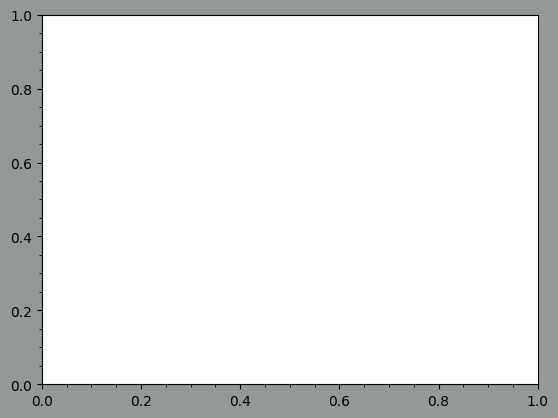

In [23]:
single.autoplot(0)

In [9]:
df.names

['Produção_de_Energia_Primária',
 'Produção_de_Energia_Primária_%',
 'Oferta_Interna_de_Energia',
 'Oferta_Interna_de_Energia_%',
 'Consumo_Final_por_Fonte',
 'Consumo_Final_por_Fonte_%',
 'Consumo_Final_por_Setor',
 'Consumo_Final_por_Setor_%',
 'Consumo_Final_Energético_por_Fonte',
 'Consumo_Final_não_Energético_por_Fonte',
 'Dependência_Externa_de_Energia',
 'Composição_Setorial_do_Consumo_de_Derivados_de_Petróleo',
 'Composição_Setorial_do_Consumo_de_Eletricidade',
 'Composição_Setorial_do_Consumo_de_Carvão_Vapor',
 'Composição_Setorial_do_Consumo_Final_de_Biomassa']